In [1]:
# 
'''ADULT INCOME PREDICTION
DATA MINING PROJECT - SPRING 2022'''
# 

'ADULT INCOME PREDICTION\nDATA MINING PROJECT - SPRING 2022'

# Part I: Building a Basic NN

In [2]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt


In [3]:
# Assigning the dataset into a dataframe
df = pd.read_csv("income_dataset.csv")
# Displaying the Statistic about dataset
print("Statistics about dataset")
print(df.describe())



Statistics about dataset
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [4]:
#Displaying top 15 records
df.head(15)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
#Viewing the data type of the dataframe
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

# Preprocessing of dataset

In [6]:
countof_reg_exp_records=df[df.eq(r"?").any(1)]
#Displaying the count regular expression records for the the dataframe
print(countof_reg_exp_records)
# finding most frquent values across categorical columns and replacing it
print(df['workclass'].mode())
df['workclass'] = df['workclass'].str.replace(r"[?]", 'Private', regex=True)
print(df['occupation'].mode())
df['occupation'] = df['occupation'].str.replace(r"[?]", 'Prof-specialty', regex=True)
print(df['native.country'].mode())
df['native.country'] = df['native.country'].str.replace(r"[?]", 'United-States',regex=True)
#Displaying the top 30 records after substitition
print(df.head(30))


       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
9       41   Private   70037  Some-college             10       Never-married   
14      51         ?  172175     Doctorate             16       Never-married   
18      22   Private  119592    Assoc-acdm             12       Never-married   
...    ...       ...     ...           ...            ...                 ...   
32533   35         ?  320084     Bachelors             13  Married-civ-spouse   
32534   30         ?   33811     Bachelors             13       Never-married   
32541   71         ?  287372     Doctorate             16  Married-civ-spouse   
32543   41         ?  202822       HS-grad              9           Separated   
32544   72         ?  129912       HS-grad              9  Married-civ-spouse   

              occupation   

In [7]:
col = df.select_dtypes(include='object').columns.values
oe = OrdinalEncoder()

# Data Visualisation 

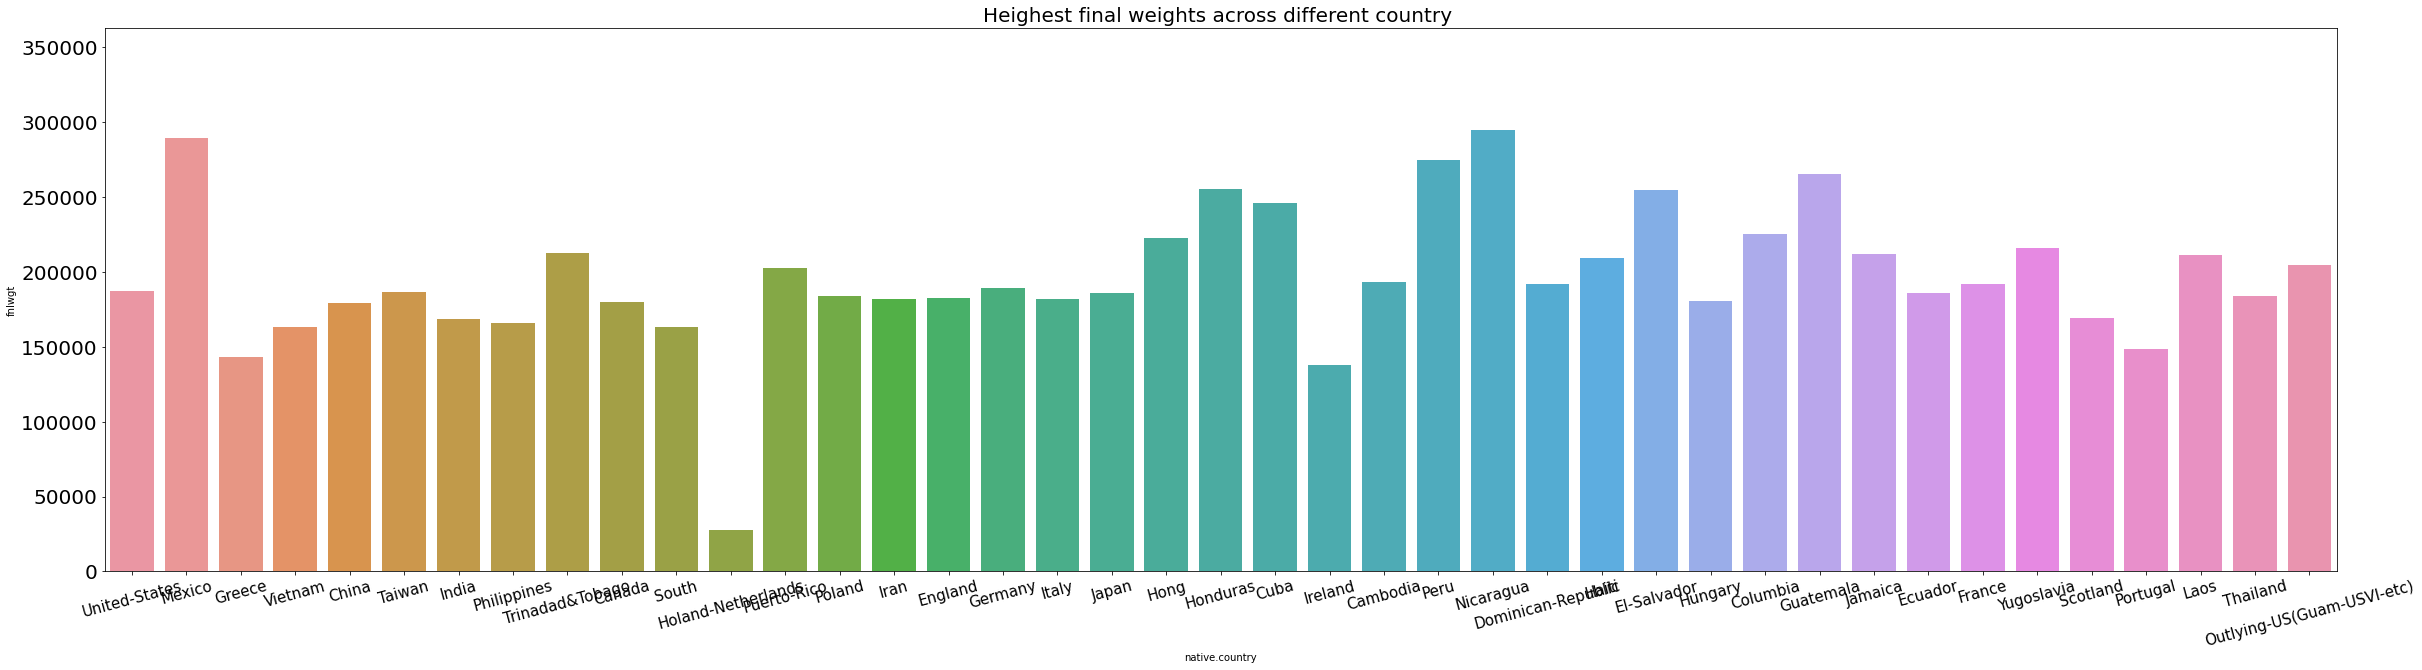

In [8]:
# Bar Graph displaying the 
f = plt.figure()
#Adding Title to the line graph
plt.title('Heighest final weights across different country ',fontsize=20)
#Setting the width of the graph to 20 for better visiblity
f.set_figwidth(40)
#Setting the height of the graph to 10 for better visiblity
f.set_figheight(10)
#Increasing label size of the x-axis ,rotating it and Y axis for better visiblity
plt.xticks(fontsize=15,rotation=15)
plt.yticks(fontsize=20)
ax = sns.barplot(x='native.country',y='fnlwgt', data=df,
                 errwidth=0)

   

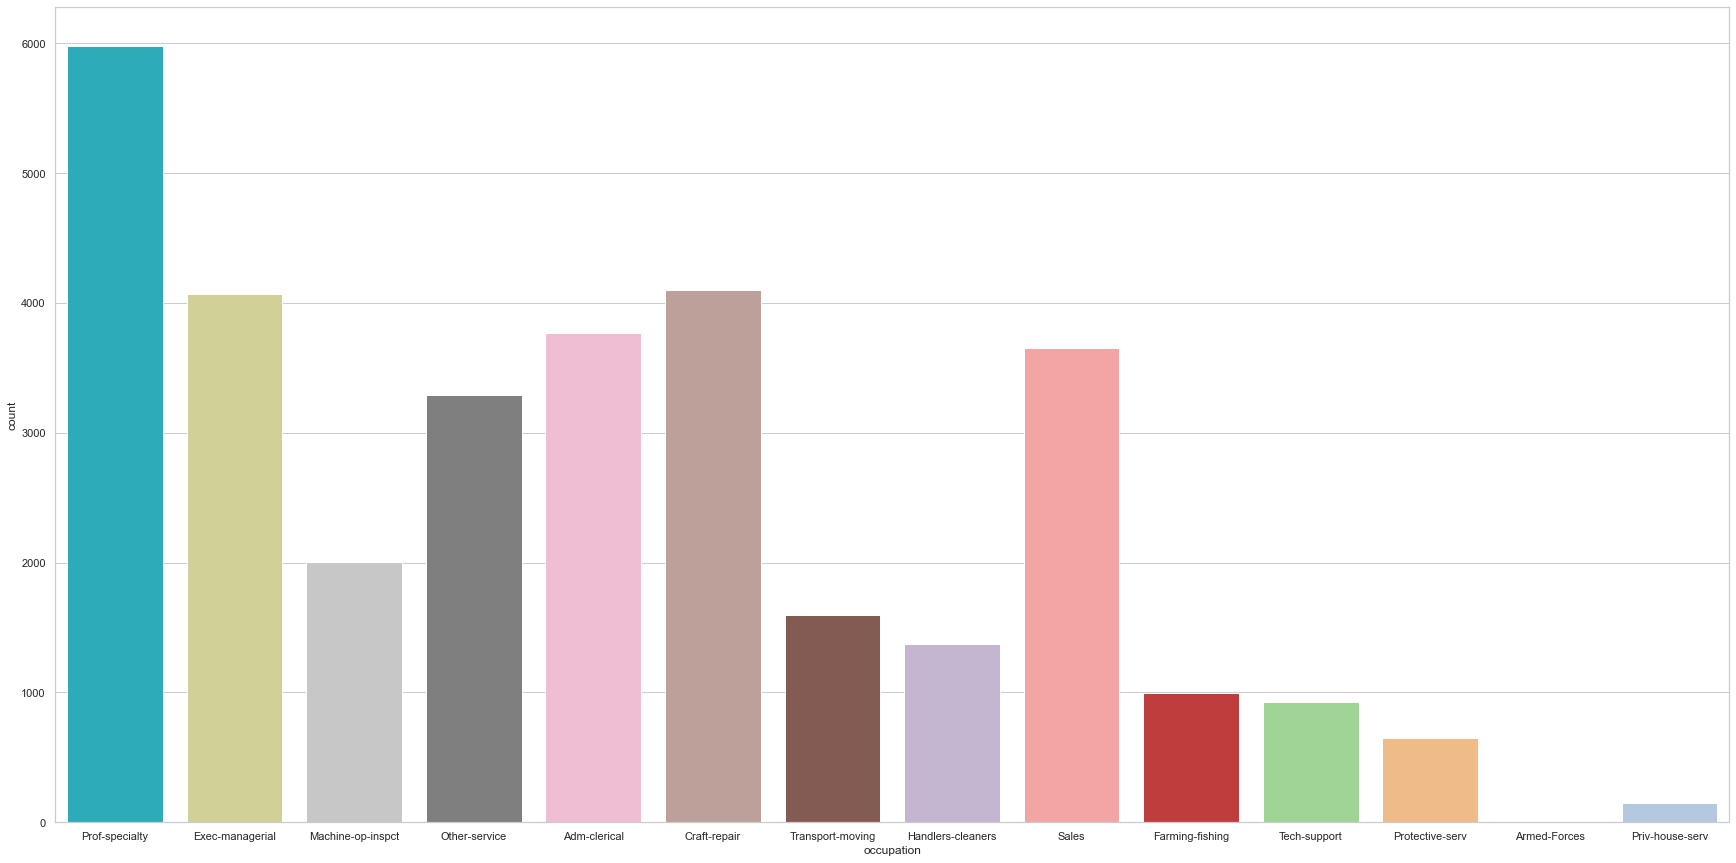

In [9]:
# Barplot graph displaying count of people based on occupation
import seaborn as sns
sns.set(rc = {'figure.figsize':(30,15)})
sns.set_theme(style="whitegrid")
# titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="occupation", data=df, palette="tab20_r")


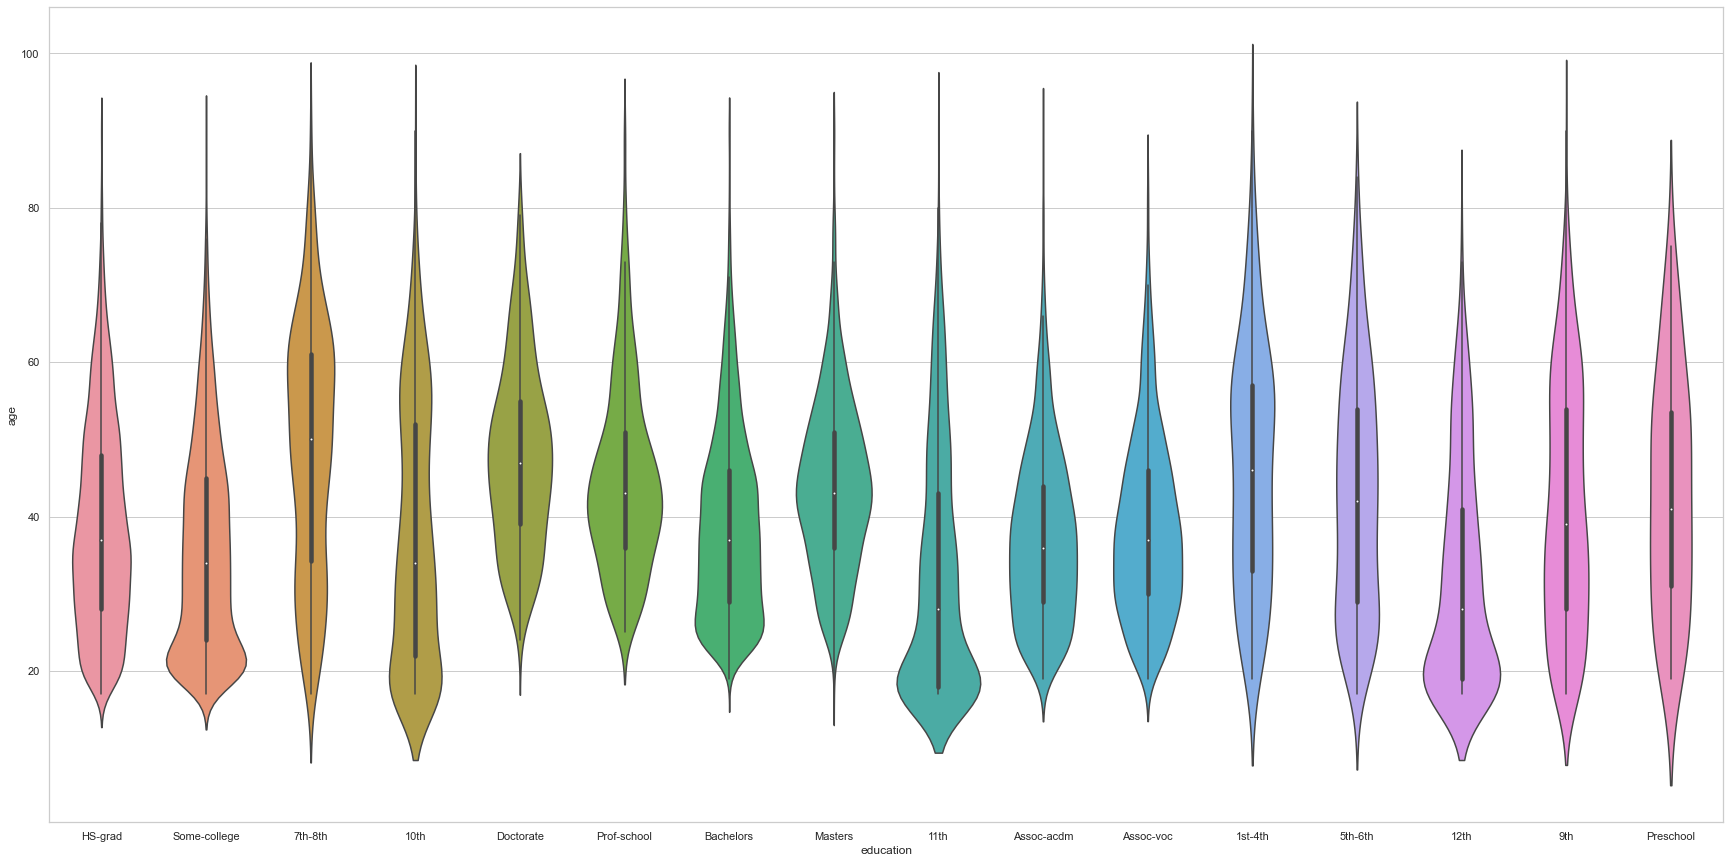

In [10]:
# Violin plot graph displaying age band on their education
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="education", y="age", data=df)

# Converting categorical features into type catogory #

In [11]:
for c in col:
    df[c] = df[c].astype('category')
    df[c] = oe.fit_transform(df[[c]])
    # Converting catogeries strings into floats

In [12]:
df.dtypes

age                 int64
workclass         float64
fnlwgt              int64
education         float64
education.num       int64
marital.status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country    float64
income            float64
dtype: object

In [13]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3.0,77053,11.0,9,6.0,9.0,1.0,4.0,0.0,0,4356,40,38.0,0.0
1,82,3.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0.0
2,66,3.0,186061,15.0,10,6.0,9.0,4.0,2.0,0.0,0,4356,40,38.0,0.0
3,54,3.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0.0
4,41,3.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0.0


<AxesSubplot:>

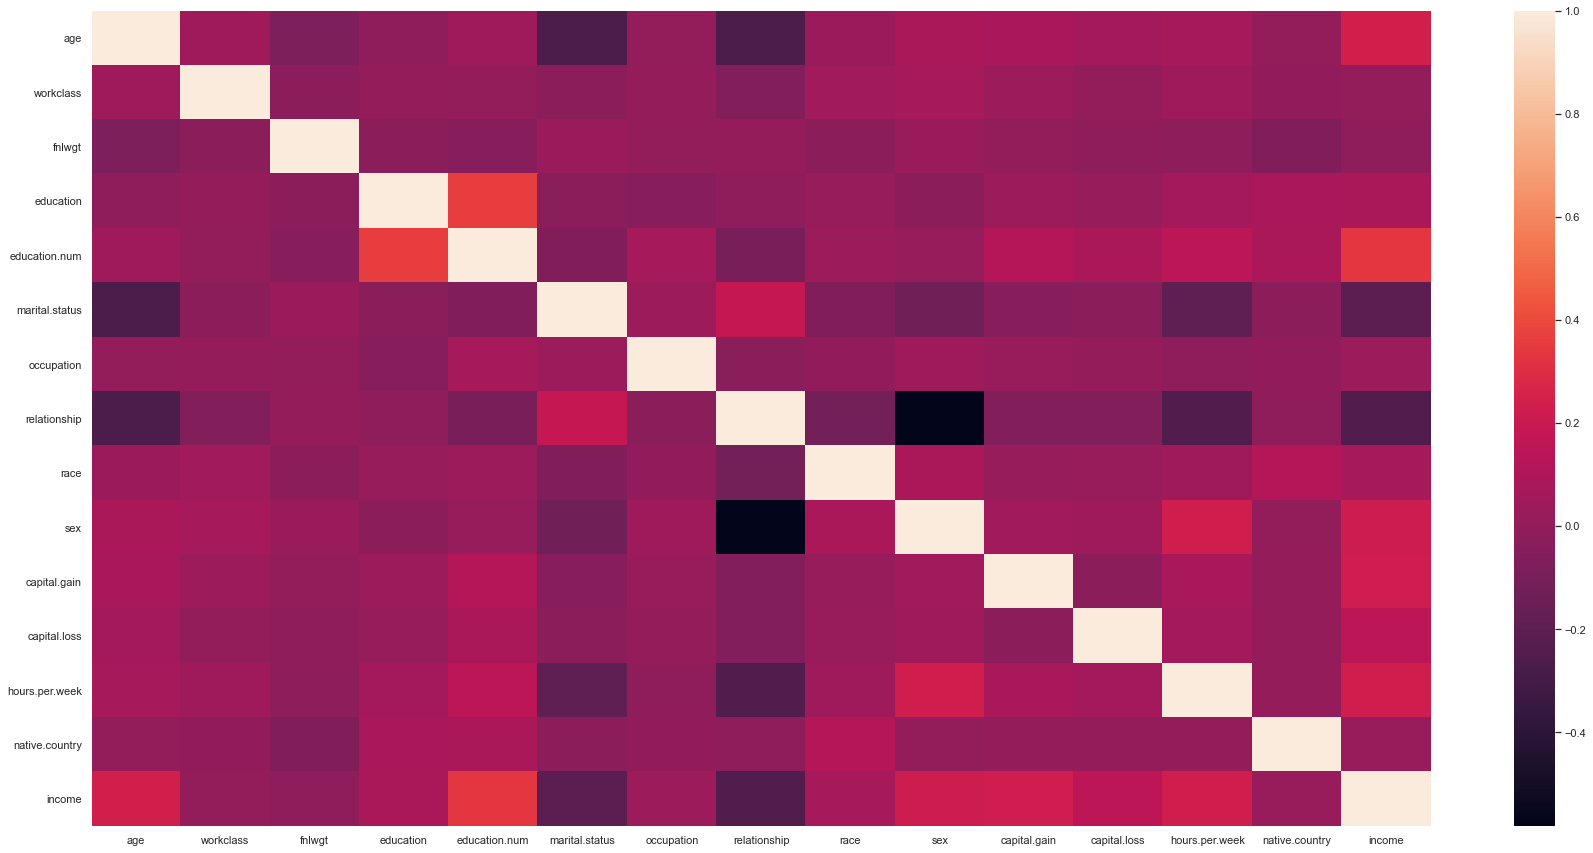

In [14]:
sns.heatmap(df.corr())

In [15]:
X = df.iloc[:,:14]
y = df.iloc[:,14:15]
# Slicing the data frame into featues and target


In [16]:
# Normalising all features
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))
 


In [17]:
X.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.428571,0.043987,0.733333,0.533333,1.000000,0.692308,0.2,1.0,0.0,0.0,1.000000,0.397959,0.95
1,0.890411,0.428571,0.081896,0.733333,0.533333,1.000000,0.230769,0.2,1.0,0.0,0.0,1.000000,0.173469,0.95
2,0.671233,0.428571,0.118021,1.000000,0.600000,1.000000,0.692308,0.8,0.5,0.0,0.0,1.000000,0.397959,0.95
3,0.506849,0.428571,0.086982,0.333333,0.200000,0.000000,0.461538,0.8,1.0,0.0,0.0,0.895317,0.397959,0.95
4,0.328767,0.428571,0.171404,1.000000,0.600000,0.833333,0.692308,0.6,1.0,0.0,0.0,0.895317,0.397959,0.95
5,0.232877,0.428571,0.138941,0.733333,0.533333,0.000000,0.538462,0.8,1.0,0.0,0.0,0.865473,0.448980,0.95
6,0.287671,0.428571,0.093938,0.000000,0.333333,0.833333,0.000000,0.8,1.0,1.0,0.0,0.865473,0.397959,0.95
7,0.780822,0.857143,0.051855,0.666667,1.000000,0.666667,0.692308,0.4,1.0,0.0,0.0,0.845500,0.193878,0.95
8,0.698630,0.000000,0.278268,0.733333,0.533333,0.000000,0.692308,0.2,1.0,0.0,0.0,0.845500,0.397959,0.95
9,0.328767,0.428571,0.039223,1.000000,0.600000,0.666667,0.153846,0.8,1.0,1.0,0.0,0.689624,0.602041,0.95


# Splitting the dataset into train and test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print ('x train: ',x_train.shape)
print ('y train: ',y_train.shape)
print ('x test: ',x_test.shape)
print ('y test: ',y_test.shape)



x train:  (26048, 14)
y train:  (26048, 1)
x test:  (6513, 14)
y test:  (6513, 1)


# Building a 3 Hidden layer neural network

In [19]:
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation='tanh'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Activation Functions

NameError: name 'Sequential' is not defined

# Calculation of number of Paramteres at each each layer

In [ ]:
#binary_crossentropy
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()


# Training the model

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=100, batch_size = 64)


# Predicting the model

In [ ]:
y_pred = model.evaluate(x_test,y_test)
print ('accuracy: ',y_pred[1]*100)

# Prediction Accuracy

# Loss Graph and Accuracy Graph

In [24]:
#Test and training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.ylabel('Loss',fontsize=20) 
plt.xlabel('Epoch',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Train', 'Test']) 
plt.show()

#Test and training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.ylabel('Accuracy',fontsize=20) 
plt.xlabel('Epoch',fontsize=20) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['Train', 'Test']) 
plt.show()

NameError: name 'history' is not defined

# Decision Tree

In [20]:
!pip install pydotplus

zsh:1: command not found: pip


In [21]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [22]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_pred_default = dt_default.predict(x_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      4943
         1.0       0.79      0.55      0.65      1570

    accuracy                           0.86      6513
   macro avg       0.83      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513



In [23]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[4714  229]
 [ 709  861]]
0.855980346998311
